In [1]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Loading data set

In [2]:
# loading the data set

df=sns.load_dataset('iris')

# FOR LOGISTIC REGRESSION INCLUDING ALL 3 SPECIES

# Data information gathering

In [3]:
# checking shape of dataframe

df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [6]:
df.count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

In [7]:
df.head(4)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


In [8]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
146,6.3,2.5,5.0,1.9,virginica
79,5.7,2.6,3.5,1.0,versicolor
96,5.7,2.9,4.2,1.3,versicolor
43,5.0,3.5,1.6,0.6,setosa
140,6.7,3.1,5.6,2.4,virginica


In [9]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


# Data cleaning

In [10]:
# checking for duplicates
df.duplicated().sum()

np.int64(1)

In [11]:
# dropping duplicates
df.drop_duplicates(inplace=True)

In [12]:
# checking for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Data visualization

<Axes: >

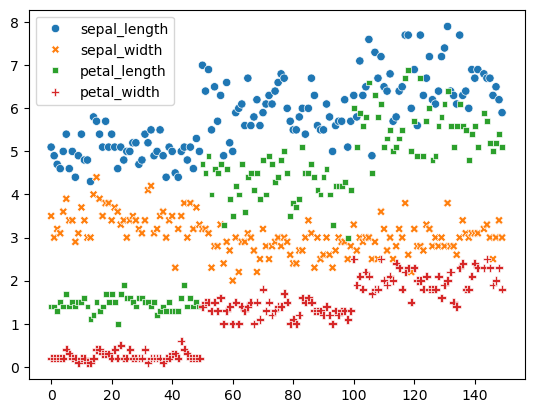

In [13]:
# scatter plot of dataframe
sns.scatterplot(df)

<Axes: >

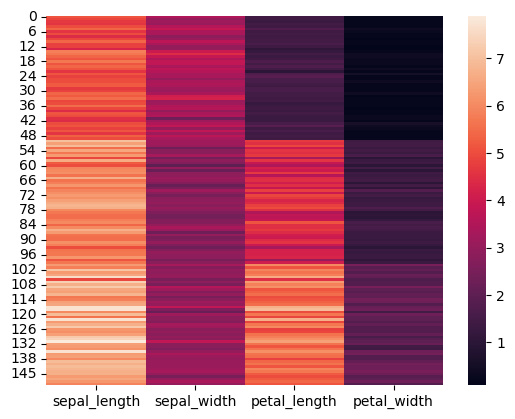

In [14]:
# creating heatmap
sns.heatmap(df.drop(columns=['species']))

<Axes: >

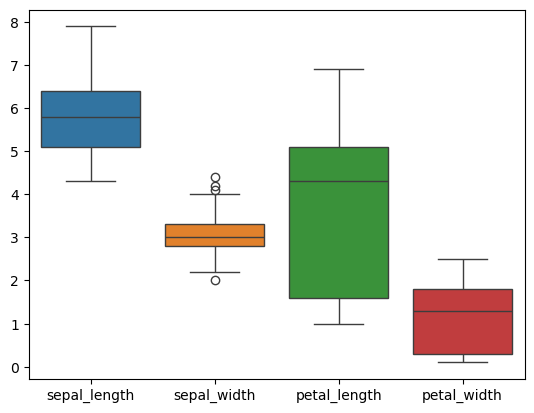

In [15]:
# creating boxplot
sns.boxplot(df)

# Handling outliers

In [16]:
# fucntion to handle outliers
def handling_outliers(col):
    q1=df[col].quantile(.25)
    q3=df[col].quantile(.75)
    iqr=q3-q1
    low_range=q1-(1.5*iqr)
    high_range=q3+(1.5*iqr)

    return df[(df[col]<low_range) |(df[col]>high_range)]

In [17]:
# extracting every column from dataframe to check outliers
for i in df.columns:
    if i=='species':
        continue
    print(handling_outliers(i))

Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []
    sepal_length  sepal_width  petal_length  petal_width     species
15           5.7          4.4           1.5          0.4      setosa
32           5.2          4.1           1.5          0.1      setosa
33           5.5          4.2           1.4          0.2      setosa
60           5.0          2.0           3.5          1.0  versicolor
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []


In [18]:
# data transformation
df['species']=df['species'].map({'setosa':0,'versicolor':1,'virginica':2})

In [19]:
x1=df.iloc[:,:4]
y1=df['species']
x1,y1

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [149 rows x 4 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 145    2
 146    2
 147    2
 148    2
 149    2
 Name: species, Length: 149, dtype: int64)

In [20]:
# Train test split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,random_state=42,test_size=.2)

In [21]:
# creating object of logistic regression to fit on the data

lr=LogisticRegression()
lr.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [22]:
# predicting value
# predicting

y_pred=lr.predict(x_test)
score=accuracy_score(y_test,y_pred)
score

1.0

# BINARY CLASSIFICATION FOR VIRGININA AND SERTOSA

In [23]:
data=sns.load_dataset('iris')

In [24]:
# extracting data frame excluding versicolor

data2=data[data['species']!='versicolor']

In [25]:
# checking shape of dataframe
data2.shape

(100, 5)

# Data info gathering

In [26]:
# data information
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  100 non-null    float64
 1   sepal_width   100 non-null    float64
 2   petal_length  100 non-null    float64
 3   petal_width   100 non-null    float64
 4   species       100 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.7+ KB


In [27]:
# getting tendency of data
data2.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,100.000000,100.000000,100.000000,100.000000
mean,5.797000,3.201000,3.507000,1.136000
std,0.945319,0.417906,2.095221,0.918114
min,4.300000,2.200000,1.000000,0.100000
25%,5.000000,3.000000,1.500000,0.200000
50%,5.700000,3.200000,3.200000,1.000000
75%,6.500000,3.425000,5.525000,2.000000
max,7.900000,4.400000,6.900000,2.500000


In [28]:
# checkign top5 data 
data2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [29]:
# checking bottom 5 data
data2.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [30]:
# checking random sample data
data2.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
28,5.2,3.4,1.4,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
117,7.7,3.8,6.7,2.2,virginica
19,5.1,3.8,1.5,0.3,setosa
110,6.5,3.2,5.1,2.0,virginica


In [31]:
data2.count()

sepal_length    100
sepal_width     100
petal_length    100
petal_width     100
species         100
dtype: int64

# data cleaning

In [32]:
data2.duplicated().sum()

np.int64(1)

In [33]:
data2.drop_duplicates(inplace=True)

/tmp/ipykernel_3565/1579751556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.drop_duplicates(inplace=True)


In [34]:
data2.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# data visualisation

<Axes: >

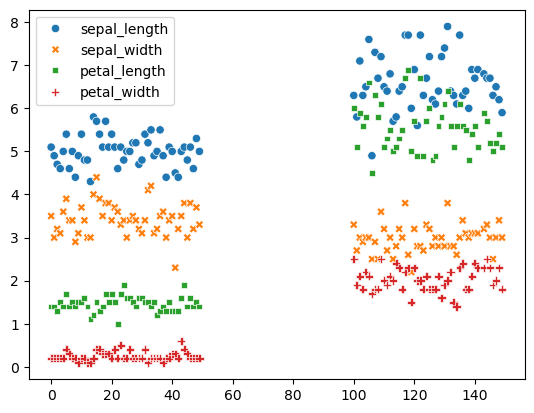

In [35]:
# scatter plot
sns.scatterplot(data2.drop(columns=['species']))

<Axes: >

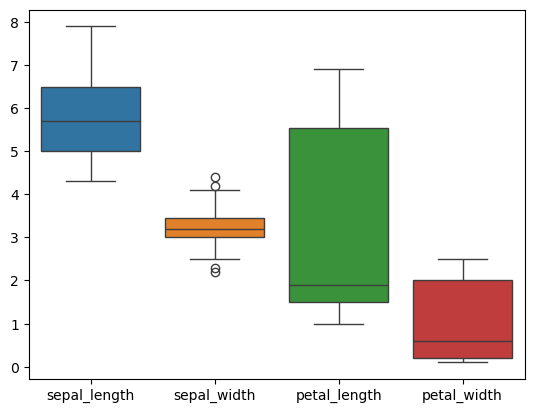

In [36]:
# boxplot
sns.boxplot(data2.drop(columns=['species']))

<Axes: >

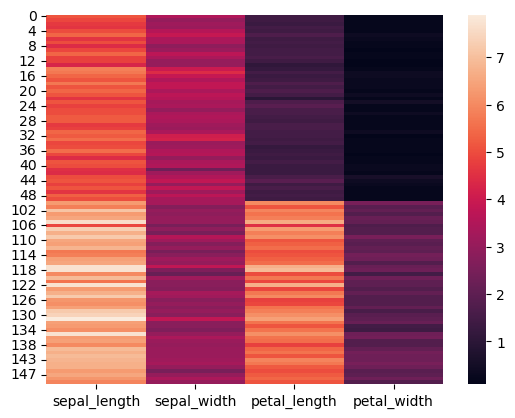

In [37]:
# heatmap
sns.heatmap(data2.drop(columns=['species']))

In [38]:
# mapping 
data2['species']=data2['species'].map({'setosa':0,'virginica':1})

/tmp/ipykernel_3565/821130587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['species']=data2['species'].map({'setosa':0,'virginica':1})


In [39]:
# diving into x2 and y2
x2=data2.iloc[:,:4]
y2=data2['species']
x2,y2

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [99 rows x 4 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 145    1
 146    1
 147    1
 148    1
 149    1
 Name: species, Length: 99, dtype: int64)

In [40]:
# train test split
x_train2,x_test2,y_train2,y_test2=train_test_split(x2,y2,random_state=42,test_size=.2)

In [41]:
# creating object of logistic regression to fit on the data

lr2=LogisticRegression()
lr2.fit(x_train2,y_train2)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [42]:
# predicting value

y_pred2=lr2.predict(x_test2)
score2=accuracy_score(y_test2,y_pred2)
score

1.0

# BINARY CLASSIFICATION FOR versicolor AND SERTOSA

In [43]:
data3=data[data['species']!='virginica']

# data information gathering

In [44]:
# getting shape of data
data3.shape

(100, 5)

In [45]:
# getting data from top
data3.head(4)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


In [46]:
# getting data from tail
data3.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor
99,5.7,2.8,4.1,1.3,versicolor


In [47]:
# data random data
data3.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
45,4.8,3.0,1.4,0.3,setosa
16,5.4,3.9,1.3,0.4,setosa
71,6.1,2.8,4.0,1.3,versicolor
41,4.5,2.3,1.3,0.3,setosa
48,5.3,3.7,1.5,0.2,setosa


In [48]:
# geting data info
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  100 non-null    float64
 1   sepal_width   100 non-null    float64
 2   petal_length  100 non-null    float64
 3   petal_width   100 non-null    float64
 4   species       100 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.7+ KB


In [49]:
# getting tendency of data
data3.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.099000,2.861000,0.786000
std,0.641698,0.478739,1.449549,0.565153
min,4.300000,2.000000,1.000000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.400000,3.050000,2.450000,0.800000
75%,5.900000,3.400000,4.325000,1.300000
max,7.000000,4.400000,5.100000,1.800000


# Data cleaning

In [50]:
# checking for duplicates
data3.duplicated().sum()

np.int64(0)

In [51]:
# checking for null values
data3.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# data visulaiszation

<Axes: >

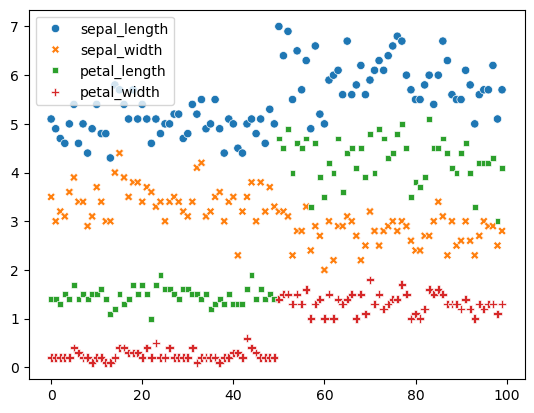

In [52]:
# scatter plot
sns.scatterplot(data3)

<Axes: >

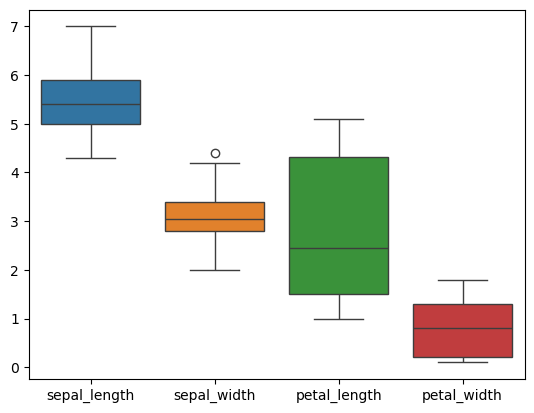

In [53]:
# boxplot
sns.boxplot(data3)

<Axes: >

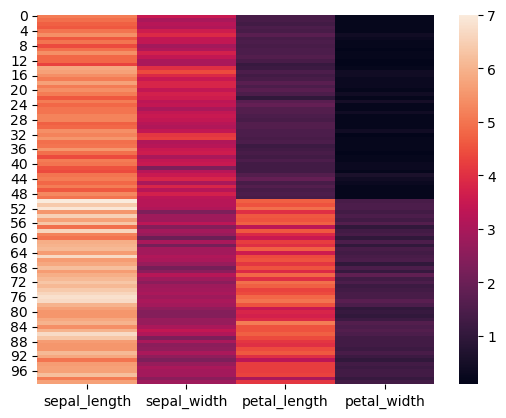

In [54]:
# heatmap
sns.heatmap(data3.drop(columns=['species']))

In [55]:
# mapping data
data3['species']=data3['species'].map({'setosa':0,'versicolor':1})

/tmp/ipykernel_3565/3372272717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['species']=data3['species'].map({'setosa':0,'versicolor':1})


In [56]:
# divinding into x3 and y3
x3=data3.iloc[:,:4]
y3=data3['species']
x3,y3

(    sepal_length  sepal_width  petal_length  petal_width
 0            5.1          3.5           1.4          0.2
 1            4.9          3.0           1.4          0.2
 2            4.7          3.2           1.3          0.2
 3            4.6          3.1           1.5          0.2
 4            5.0          3.6           1.4          0.2
 ..           ...          ...           ...          ...
 95           5.7          3.0           4.2          1.2
 96           5.7          2.9           4.2          1.3
 97           6.2          2.9           4.3          1.3
 98           5.1          2.5           3.0          1.1
 99           5.7          2.8           4.1          1.3
 
 [100 rows x 4 columns],
 0     0
 1     0
 2     0
 3     0
 4     0
      ..
 95    1
 96    1
 97    1
 98    1
 99    1
 Name: species, Length: 100, dtype: int64)

In [57]:
# train test split

x_train3,x_test3,y_train3,y_test3=train_test_split(x3,y3,random_state=42,test_size=.2)

In [58]:
# creating object of logistic regression to fit on the data

lr3=LogisticRegression()
lr3.fit(x_train3,y_train3)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [59]:
# predicting value

y_pred3=lr3.predict(x_test3)
score3=accuracy_score(y_test3,y_pred3)
score

1.0

# BINARY CLASSIFICATION FOR VIRGININA AND VIRGINICA

In [60]:
data4=data[data['species']!='setosa']

# Data info gathering

In [61]:
# getting data info
data4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 50 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  100 non-null    float64
 1   sepal_width   100 non-null    float64
 2   petal_length  100 non-null    float64
 3   petal_width   100 non-null    float64
 4   species       100 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.7+ KB


In [62]:
# getting tendency of data
data4.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,100.000000,100.000000,100.000000,100.000000
mean,6.262000,2.872000,4.906000,1.676000
std,0.662834,0.332751,0.825578,0.424769
min,4.900000,2.000000,3.000000,1.000000
25%,5.800000,2.700000,4.375000,1.300000
50%,6.300000,2.900000,4.900000,1.600000
75%,6.700000,3.025000,5.525000,2.000000
max,7.900000,3.800000,6.900000,2.500000


In [63]:
# checking head of data
data4.head(4)

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor


In [64]:
# getting data from bottom
data4.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [65]:
# getting random data
data4.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
51,6.4,3.2,4.5,1.5,versicolor
139,6.9,3.1,5.4,2.1,virginica
96,5.7,2.9,4.2,1.3,versicolor
118,7.7,2.6,6.9,2.3,virginica
78,6.0,2.9,4.5,1.5,versicolor


In [66]:
data4.count()

sepal_length    100
sepal_width     100
petal_length    100
petal_width     100
species         100
dtype: int64

# Data cleaning

In [67]:
# checking for duplicates
data4.duplicated().sum()

np.int64(1)

In [68]:
# handling duplicate values
data4.drop_duplicates(inplace=True)

/tmp/ipykernel_3565/3874009730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4.drop_duplicates(inplace=True)


In [69]:
# checking for missing values
data4.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# data visualization

<Axes: >

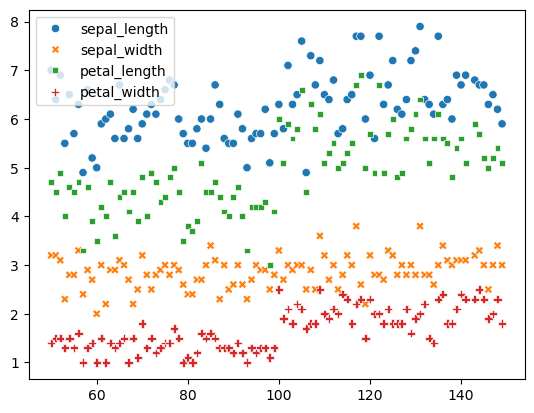

In [70]:
# scatter plot
sns.scatterplot(data4)

<Axes: >

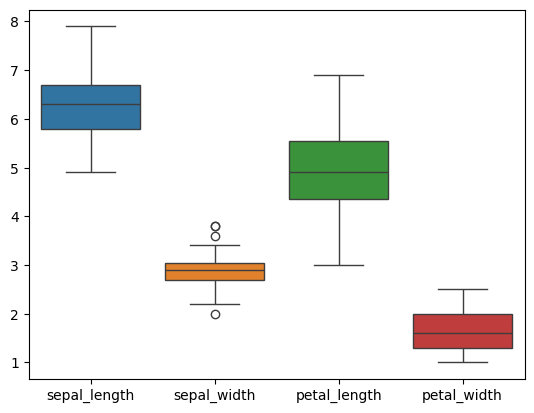

In [71]:
# boxplot
sns.boxplot(data4)

<Axes: >

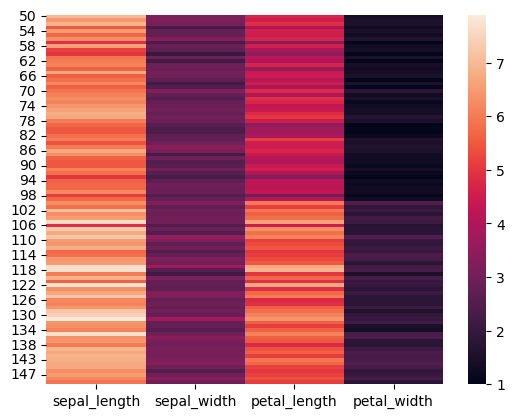

In [72]:
# heatmap
sns.heatmap(data4.drop(columns=['species']))

In [73]:
# mapping
data4['species']=data4['species'].map({'versicolor':0,'virginica':1})

/tmp/ipykernel_3565/1523412463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['species']=data4['species'].map({'versicolor':0,'virginica':1})


In [74]:
# x4 and y4 divide
x4=data4.iloc[:,:4]
y4=data4['species']
x4,y4

(     sepal_length  sepal_width  petal_length  petal_width
 50            7.0          3.2           4.7          1.4
 51            6.4          3.2           4.5          1.5
 52            6.9          3.1           4.9          1.5
 53            5.5          2.3           4.0          1.3
 54            6.5          2.8           4.6          1.5
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [99 rows x 4 columns],
 50     0
 51     0
 52     0
 53     0
 54     0
       ..
 145    1
 146    1
 147    1
 148    1
 149    1
 Name: species, Length: 99, dtype: int64)

In [75]:
# train test split

x_train4,x_test4,y_train4,y_test4=train_test_split(x4,y4,random_state=42,test_size=.2)

In [76]:
# creating object of logistic regression to fit on the data

lr4=LogisticRegression()
lr4.fit(x_train4,y_train4)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [77]:
# predicting value

y_pred4=lr4.predict(x_test4)
score4=accuracy_score(y_test4,y_pred4)
score

1.0

# Decision tree classifier

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
regression1 = DecisionTreeClassifier()
regression1.fit(x_train,y_train)
y_pred = regression1.predict(x_test)
score = accuracy_score(y_test,y_pred)
print(score)

1.0


[Text(0.3076923076923077, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.666\nsamples = 119\nvalue = [40, 41, 38]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.2692307692307693, 0.8571428571428572, 'True  '),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.499\nsamples = 79\nvalue = [0, 41, 38]'),
 Text(0.34615384615384615, 0.8571428571428572, '  False'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.21\nsamples = 42\nvalue = [0, 5, 37]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2,

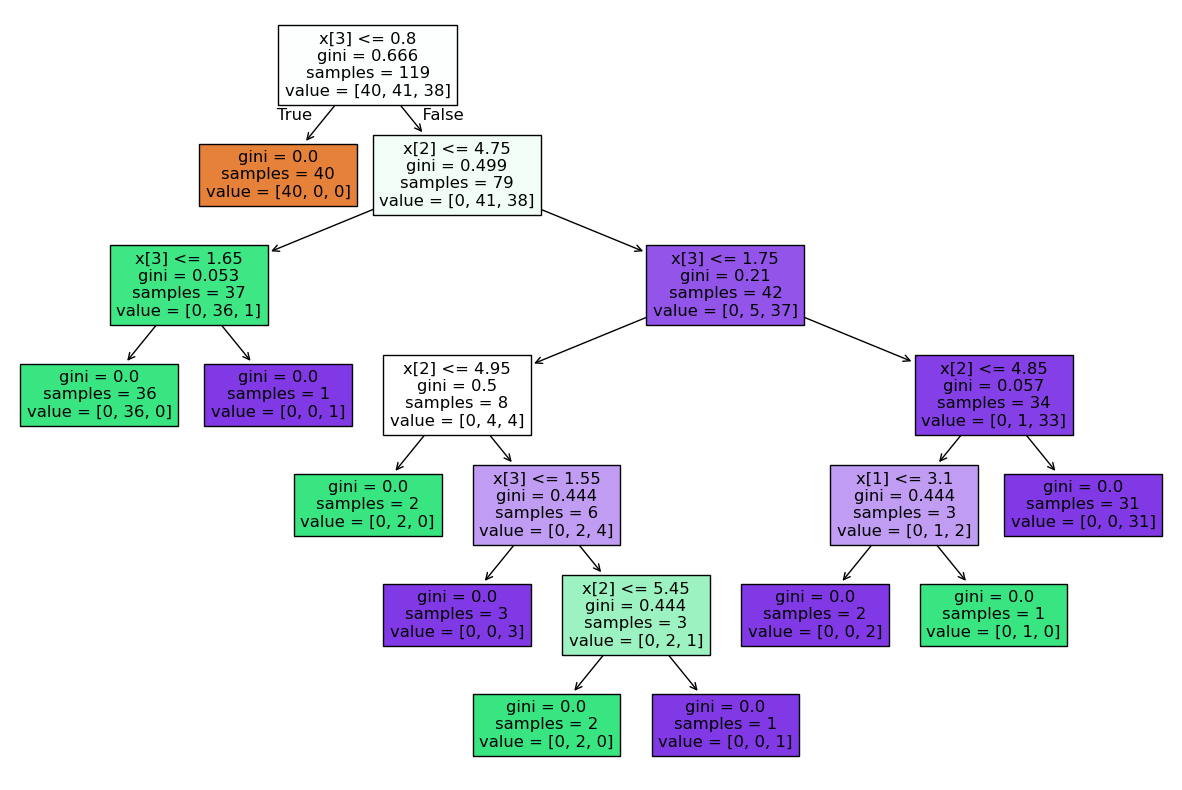

In [79]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(regression1,filled=True)

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
regression1 = RandomForestClassifier()
regression1.fit(x_train,y_train)
y_pred = regression1.predict(x_test)
score = accuracy_score(y_test,y_pred)
print(score)


1.0


In [81]:
summary_df = pd.DataFrame({
    "Model": ["Logistic regression 1", "Binary classification 1", "Binary classification 2", "Binary classification 3"],
    
    "Score": [round(score, 4), round(score2, 4), round(score3, 4), round(score4, 4)],
    "Actual 1": [y_test.iloc[0], y_test2.iloc[0], y_test3.iloc[0], y_test4.iloc[0]],
    "Predicted 1": [y_pred[0], y_pred2[0], y_pred3[0], y_pred4[0]],
    
    "Actual 2": [y_test.iloc[1], y_test2.iloc[1], y_test3.iloc[1], y_test4.iloc[1]],
    "Predicted 2": [y_pred[1], y_pred2[1], y_pred3[1], y_pred4[1]],
    
    "Actual 3": [y_test.iloc[2], y_test2.iloc[2], y_test3.iloc[2], y_test4.iloc[2]],
    "Predicted 3": [y_pred[2], y_pred2[2], y_pred3[2], y_pred4[2]]
    
})

summary_df


,Model,Score,Actual 1,Predicted 1,Actual 2,Predicted 2,Actual 3,Predicted 3
0,Logistic regression 1,1.00,1,1,0,0,2,2
1,Binary classification 1,1.00,1,1,0,0,1,1
2,Binary classification 2,1.00,1,1,1,1,1,1
3,Binary classification 3,0.95,1,1,0,0,1,1
